In [109]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

In [110]:

def score_classifier(dataset,classifier,labels):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """

    kf = KFold(n_splits=5,random_state=50,shuffle=True)
    confusion_mat = np.zeros((2,2))
    recall = 0
    accuracy = 0
    for training_ids,test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        classifier.fit(training_set,training_labels)
        predicted_labels = classifier.predict(test_set)
        confusion_mat+=confusion_matrix(test_labels,predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
        accuracy += accuracy_score(test_labels, predicted_labels)
    recall/=5
    accuracy/=5
    print('Confusion Matrix : ', confusion_mat)
    print('Recall : ', recall)
    print('Accuracy : ', accuracy)

In [111]:
# Load dataset
df = pd.read_csv(".\\nba_logreg.csv")

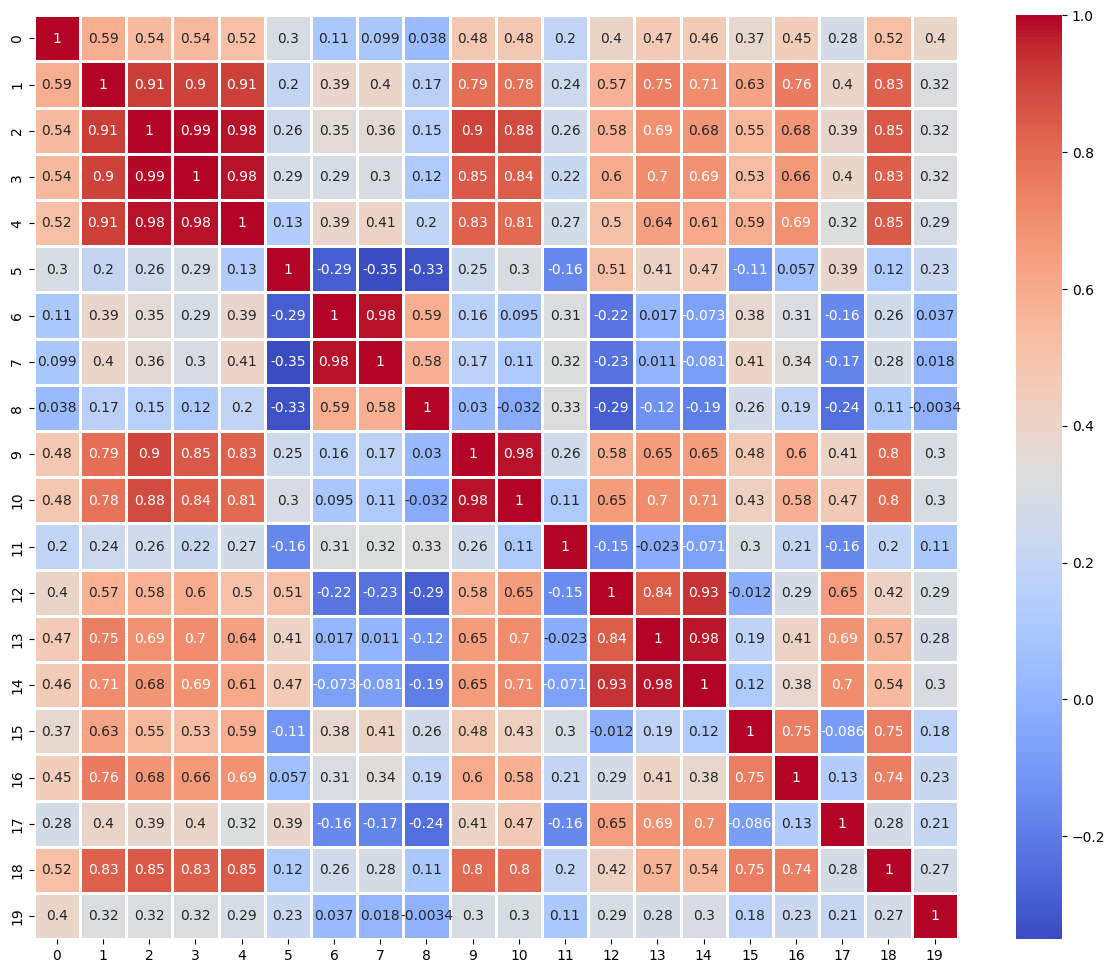

In [112]:
# matrice de corrélation
df_no_name = pd.DataFrame(df.drop(['Name'],axis=1).values)
correlation_matrix = df_no_name.corr()

plt.figure(figsize=(15, 12))  # Modifier (largeur, hauteur)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=2, square=True)
plt.show()

Cette matrice de corrélation permet de constater que les paramètres 6, 7, 8, c'est à dire 3PointMade, 3PointAttempts, 3PointAttempts% ont peu d'influence sur la longueur de la carrière du joueur (paramètre 19). Il est possible d'entrainer un modèle ne prenant pas en compte ces 3 paramètres et de le comparer à un modèle les prenant en compte. 

In [113]:
# extract names, labels, features names and values
names = df['Name'].values.tolist() # players names
labels = df['TARGET_5Yrs'].values # labels

paramset = df.drop(['TARGET_5Yrs','Name'],axis=1).columns.values
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1).values

paramset_no_3p = df.drop(['TARGET_5Yrs','Name', '3P Made', '3PA', '3P%'],axis=1).columns.values
df_vals_no_3p = df.drop(['TARGET_5Yrs','Name', '3P Made', '3PA', '3P%'],axis=1).values

# replacing Nan values (only present when no 3 points attempts have been performed by a player)
for x in np.argwhere(np.isnan(df_vals)):
    df_vals[x]=0.0
    
# normalize dataset
X = MinMaxScaler().fit_transform(df_vals)

X_NO_3P = MinMaxScaler().fit_transform(df_vals_no_3p)

Utilisation d'un modèle Random Forest

In [ ]:
ranfom_forest_clf = RandomForestClassifier()
score_classifier(X,ranfom_forest_clf,labels)

ranfom_forest_clf_no_3p = RandomForestClassifier()
score_classifier(X_NO_3P,ranfom_forest_clf_no_3p,labels)

[[262. 247.]
 [175. 656.]]
Recall :  0.7903091521766955
Accuracy :  0.6850746268656717
[[263. 246.]
 [188. 643.]]
Recall :  0.7746297972753629
Accuracy :  0.6761194029850746


Utilisation d'un modèle SVM